In [ ]:
# for each repo
    # for each bug folder
        # iterate over file with the same name in `before` and `after`
            # compute diff
            # if diff is empty: nothing
            # else:
                # increase the counter of files, hunks, and lines for the bug
                
# iterate over 
        # read before folder
        # read after folder
        

In [21]:
import os
import difflib as dl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
FOLDER_A = "/home/paltenmo/Documents/QUANT-PROG/OOPSLA_21_Artifacts/Bugs-Quantum-Computing-Platforms/artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#567/before/"
FOLDER_B = "/home/paltenmo/Documents/QUANT-PROG/OOPSLA_21_Artifacts/Bugs-Quantum-Computing-Platforms/artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#567/after/"

In [4]:
# for each repo
    # for each bug folder
        # iterate over file with the same name in `before` and `after`
            # compute diff
            # if diff is empty: nothing
            # else:
                # increase the counter of files, hunks, and lines for the bug

                
def read_content(path):
    with open(path, 'r') as in_file:
        return in_file.read()
                
def iterate_over(folder_master, folder_slave): 
    """Iterate over file with the two folders, return the file contents.
    
    Note that only files in common are returned.
    """
    files_in_master = [
        f for f in os.listdir(folder_master)
        if os.path.isfile(os.path.join(folder_master, f))
    ]
    files_in_slave = [
        f for f in os.listdir(folder_slave)
        if os.path.isfile(os.path.join(folder_slave, f))
    ]
    files_in_common = set(files_in_master).intersection(set(files_in_slave))
    results = []
    
    for filename in files_in_common:
        file_master = os.path.join(folder_master, filename)
        file_slave = os.path.join(folder_slave, filename)
        print(file_master)
        print(file_slave)
        content_master = read_content(file_master)
        content_slave = read_content(file_slave)
        item = (filename, content_master, content_slave)
        results.append(item)
        
    return results

In [5]:
#iterate_over(folder_master=FOLDER_A, folder_slave=FOLDER_B)

In [6]:
os.listdir("../artifacts/minimal_commits_v02")

['mitiq',
 'qsharp-runtime',
 'strawberryfields',
 'tequila',
 'pennylane',
 'qiskit-terra',
 'qiskit-aer',
 'rules.md',
 'qsharp-compiler',
 'amazon-braket-sdk-python',
 'dwave-system',
 'qiskit-ignis',
 'OpenQL',
 'ProjectQ',
 'pyquil',
 'QuantumLibraries',
 'qulacs',
 'xacc',
 'Cirq']

In [7]:
def get_line_numbers(line):
    token = line.split(" ")
    numbers_old_file = token[1]
    numbers_new_file = token[2]
    delete_line_number = (
        int(numbers_old_file.split(",")[0].replace("-", "")) - 1
    )
    additions_line_number = int(numbers_new_file.split(",")[0]) - 1
    return delete_line_number, additions_line_number

def get_hunks(text_diff):
    """Extract the hunks form the unified diff."""
    lines = text_diff.split("\n")
    modified_lines = {
        "added": [],
        "deleted": [],
    }  # type: Dict[str, List[Tuple[int, str]]]

    count_deletions = 0
    count_additions = 0

    chunks = []
    
    # there are different section types: 
    # header, unchanged_text, add_section, del_section
    c_section = 'unchanged_text'
    prev_section = 'unchanged_text'
    chunk = {
        "added": [],
        "deleted": [],
    }
    
    for line in lines:
        line = line.rstrip()
        count_deletions += 1
        count_additions += 1

        
        if line.startswith("@@"):
            c_section = 'header'
            count_deletions, count_additions = get_line_numbers(line)
            # initialize a new dictionary for the change hunk
            chunk = {
                "added": [],
                "deleted": [],
            }
            
        elif line.startswith("-"):
            c_section = 'del_section'
            modified_lines["deleted"].append((count_deletions, line[1:]))
            count_additions -= 1
            # append this line as deleted line of this change hunk
            chunk["deleted"].append((count_deletions, line[1:]))

        elif line.startswith("+"):
            c_section = 'add_section'
            modified_lines["added"].append((count_additions, line[1:]))
            count_deletions -= 1
            # append this line as added line of this change hunk
            chunk["added"].append((count_additions, line[1:]))

        elif line == r"\ No newline at end of file":
            count_deletions -= 1
            count_additions -= 1
            
        else:
            c_section = 'unchanged_text'
            # if we came out of a change hunk section we can close this chunk
            # and append it to the chunks list
            if c_section != prev_section and prev_section != 'header':
                chunks.append(chunk)
                chunk = {
                    "added": [],
                    "deleted": [],
                }
        
        prev_section = c_section
        
    # flush the last change (if present)
    if len(chunk['added']) > 0 or len(chunk['deleted']) > 0:
        chunks.append(chunk)

    return chunks

In [60]:
diffs = dl.unified_diff(["ciao", "come"], ["ciao", "come"])
text_diff = "\n".join(list(diffs))
# remove the useless preface before the "@@" character
text_diff = text_diff[text_diff.find("@@"):]
print(name)
print(text_diff)
#print("-" * 80)
#print("HUNKS:")
#print("-" * 80)
hunks = get_hunks(text_diff)
print(hunks)
# count the lines
n_modified_lines = 0
for h_i, hunk in enumerate(hunks):
    print(f"Hunk {h_i}")

cvx_fit.py

[]


In [62]:
REPOS_FOLDER = "../artifacts/minimal_commits_v02"

repos = ["qiskit-ignis"] # os.listdir(REPOS_FOLDER)

reports = []

for reponame in repos:
    
    path_repo = os.path.join(REPOS_FOLDER, reponame)
    repo_bugs = os.listdir(path_repo)    
    
    for bug_folder_name in repo_bugs:      
        
        path_bug_folder = os.path.join(path_repo, bug_folder_name)
        
        folder_before = os.path.join(path_bug_folder, "before")
        folder_after = os.path.join(path_bug_folder, "after")
        
        # read metadata
        path_metadata = os.path.join(path_bug_folder, "metadata.json")
        with open(path_metadata, "r") as metadata_file:
            metadata = json.load(metadata_file)
        
        for name, content_before, content_after in iterate_over(
                folder_master=folder_before, 
                folder_slave=folder_after):
            diffs = dl.unified_diff(
                content_before.splitlines(False), 
                content_after.splitlines(False))
            text_diff = "\n".join(list(diffs))
            # remove the useless preface before the "@@" character
            text_diff = text_diff[text_diff.find("@@"):]
            print(name)
            print(text_diff)
            #print("-" * 80)
            #print("HUNKS:")
            #print("-" * 80)
            hunks = get_hunks(text_diff)
            # count the lines
            n_modified_lines = 0
            for h_i, hunk in enumerate(hunks):
                print(f"Hunk {h_i}")
                print(hunk)
                i_modified_lines = max(len(hunk["deleted"]), len(hunk["added"]))
                n_modified_lines += i_modified_lines
            # if the file has any change, store it
            if len(hunks) > 0:
                report = {
                    "n_lines": n_modified_lines,
                    "n_hunks": len(hunks),
                    "filename": name,
                    "n_files": 1,
                    **metadata
                }
                reports.append(report)

../artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#576/before/tox.ini
../artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#576/after/tox.ini
tox.ini
@@ -33,7 +33,7 @@

     stestr run {posargs}
 
 [testenv:lint]
-basepython = python3.8
+basepython = python3
 deps =
   git+https://github.com/Qiskit/qiskit-terra.git
   qiskit-aer
Hunk 0
{'added': [(37, 'basepython = python3')], 'deleted': [(37, 'basepython = python3.8')]}
../artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#550/before/test_dihedral.py
../artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#550/after/test_dihedral.py
../artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#550/before/dihedral.py
../artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#550/after/dihedral.py
test_dihedral.py
@@ -20,7 +20,7 @@

 import numpy as np
 from qiskit.circuit import QuantumCircuit
 from qiskit.quantum_info.operators import Operator
-from qiskit.quantum_info.operators.pauli import Pauli
+from qiskit.quantum

In [63]:

df_reports = pd.DataFrame.from_records(reports)

In [64]:
df_reports.head()

,n_lines,n_hunks,filename,n_files,commit_hash,commit_msg,project_name,id,human_id,author_comment
0,1,1,tox.ini,1,2f47127a99b709af2ea1f844aeee8f1d90e49194,Fix tox.ini lint job's basepython (#576)\n\nIn...,qiskit-ignis,33,qiskit-ignis#576,"In a tox.ini python3.8 was too specific, worki..."
1,2,2,test_dihedral.py,1,824372e18a42a735bbef37cd8ee61bc5d5821f9f,Fix CNOTDihedral class to support OpShape (#550),qiskit-ignis,30,qiskit-ignis#550,"Reporter: ""Since Qiskit/qiskit-terra#5432 was ..."
2,3,2,dihedral.py,1,824372e18a42a735bbef37cd8ee61bc5d5821f9f,Fix CNOTDihedral class to support OpShape (#550),qiskit-ignis,30,qiskit-ignis#550,"Reporter: ""Since Qiskit/qiskit-terra#5432 was ..."
3,56,3,fitters.py,1,864663d2f6212d893731ec2b5678592e4f9a4a02,Fix weight calculation (#567)\n\nThe weight_sy...,qiskit-ignis,32,qiskit-ignis#567,"Reporter: ""The weight_syndrome_graph method of..."
4,5,4,test_entanglement.py,1,838bc0f750d63b4ea14789fd174f9a10f51f61c2,Fixed entanglement test (#388),qiskit-ignis,16,qiskit-ignis#388,"Reporter: ""Fixed entanglement test"". Similar f..."


In [65]:
df_grouped = df_reports.groupby(by=["human_id", "id", "project_name", "commit_hash"]).sum().reset_index()
df_grouped["comprehensive_id"] = df_grouped.apply(
    lambda row: f'{row["human_id"]} ({row["id"]})',
    axis=1
)

In [66]:
df_grouped.head(20)

,human_id,id,project_name,commit_hash,n_lines,n_hunks,n_files,comprehensive_id
0,qiskit-ignis#231,4,qiskit-ignis,3694ca68abf54a03e73318e81d8932e6a7159f12,8,8,3,qiskit-ignis#231 (4)
1,qiskit-ignis#240,7,qiskit-ignis,23d5ef8231d0bb95cb03ad9b1b62ee37757b24b3,243,25,3,qiskit-ignis#240 (7)
2,qiskit-ignis#3,1,qiskit-ignis,ec1b4ce759f1fb8ba0242dd6c4a309fa1b586666,17,1,1,qiskit-ignis#3 (1)
3,qiskit-ignis#302,10,qiskit-ignis,e696fee3e52550f50fb240a4c6356c61c9f01725,2,2,1,qiskit-ignis#302 (10)
4,qiskit-ignis#333,11,qiskit-ignis,3c59f82c11e87c071bc7e84240b50e2aa995281f,13,12,2,qiskit-ignis#333 (11)
5,qiskit-ignis#388,16,qiskit-ignis,838bc0f750d63b4ea14789fd174f9a10f51f61c2,5,4,1,qiskit-ignis#388 (16)
6,qiskit-ignis#466,26,qiskit-ignis,439b3ee739fde633337f89b617c18821b25da0ad,2,2,1,qiskit-ignis#466 (26)
7,qiskit-ignis#492,27,qiskit-ignis,0af27dd1fdd5c4e4d2ef80d21d0375d11a1625fd,2,1,1,qiskit-ignis#492 (27)
8,qiskit-ignis#550,30,qiskit-ignis,824372e18a42a735bbef37cd8ee61bc5d5821f9f,5,4,2,qiskit-ignis#550 (30)
9,qiskit-ignis#563,31,qiskit-ignis,1f7b71999c28483064e91882ef1510ede23ba0e2,13,5,3,qiskit-ignis#563 (31)


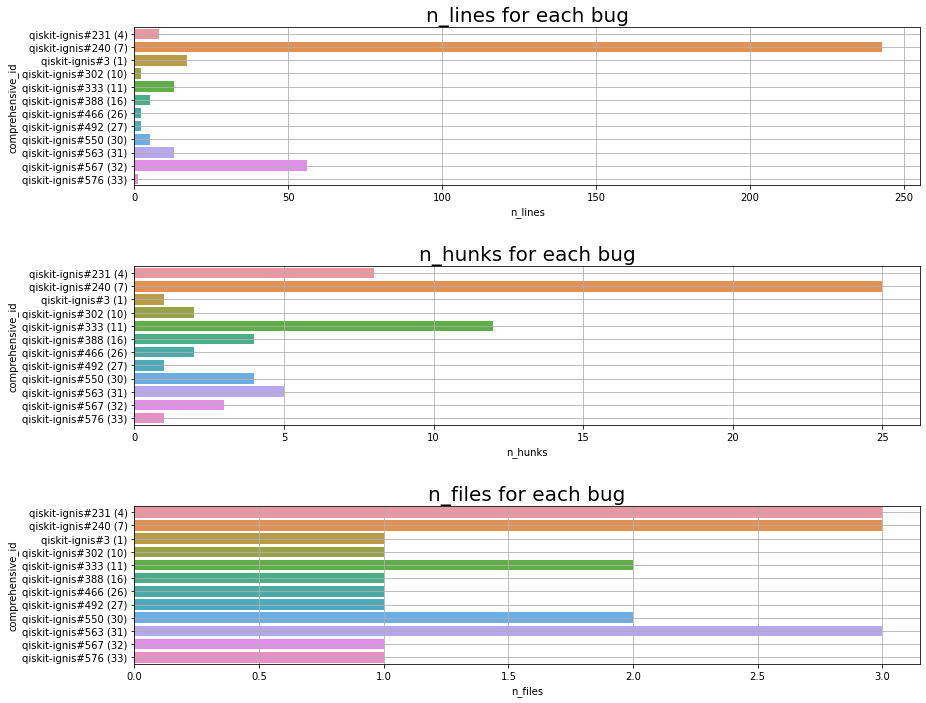

In [67]:
def plot_bug_level_summary(df):
    """Plot the summary for both id and human id of the relevent stats."""
    
    stats_shown = ["n_lines", "n_hunks", "n_files"]
    n_stats_shown = len(stats_shown)
    
    n_bugs = len(df)
    height = (.3 * n_bugs) * n_stats_shown
    
    fig, axes = plt.subplots(n_stats_shown, 1, figsize=(13, height))
    plt.tight_layout(pad=6)
    for stat_i, stat_name in enumerate(stats_shown):   
        ax_stat = axes[stat_i]
        # Number of lines
        sns.barplot(
            data=df,
            y="comprehensive_id",
            x=stat_name,
            ax = ax_stat
        ) 
        ax_stat.set_title(f"{stat_name} for each bug", fontsize=20)
        ax_stat.grid()
    
plot_bug_level_summary(df=df_grouped)